# Proyecto del Curso

### Cargar los datos

Vamos a trabajar con un dataset de lenguajes de señas. Para ello, vamos a descargar los datos de la nube de Google

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \ -O ./sign-language-img.zip

--2024-11-01 09:08:46--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.132.91, 142.251.132.123, 142.251.132.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.132.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24265584 (23M) [application/zip]
Saving to: ‘sign-language-img.zip’

sign-language-img.z 100%[===================>]  23.14M  1.50MB/s    in 20s     

2024-11-01 09:09:07 (1.15 MB/s) - ‘sign-language-img.zip’ saved [24265584/24265584]

--2024-11-01 09:09:07--  http://%20-o/
Resolving  -o ( -o)... failed: Name or service not known.
wget: unable to resolve host address ‘ -o’
--2024-11-01 09:09:07--  http://./sign-language-img.zip
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2024-11-01 09:09:07--
Total wall clock time: 21s
Downloaded: 1 files, 23M in 20s (1.15 MB/s)


Una vez descargado el archivo .zip en nuestro entorno local, procedemos a  descomprimirlo

In [2]:
import os
import zipfile

In [ ]:
# ruta donde se encuentra el .zip
path_zip = './sign-language-img.zip'

# obtencion de los archivos de zip
zip_ref = zipfile.ZipFile(path_zip, 'r')
zip_ref.extractall('./sign-language-img')
zip_ref.close()

La estructura del dataset constará en 2 directorios principales: Test y Train, donde para cada clase (letra en señas) tendremos un directorio con sus respectivos ejemplos.

### Cargar el dataset con Keras dataset generator

Procedemos a cargar las librerias necesarias.

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf

# libreria para trabajar con las bases de datos 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Cargamos las rutas donde se encuentra nuestro dataset

In [5]:
train_dir = './sign-language-img/Train'
test_dir = './sign-language-img/Test'

Generamos los data generators al mismo tiempo que reescalamos los datos al rango entre 0 y 1 para mejorar la convergencia del modelo. Ademas. dividimos el 20% de los datos de prueba a validacion para monitorear el rendimiento del modelo en vivo

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

Para cargar las imágenes, haremos uso del método flow_from_directory del generador, determinaremos el directorio fuente, el tamaño que tendrán las imágenes (el generador las redimensionará de ser necesario), los lotes de procesamiento, el tipo de clases, el tipo de escala de colores y el subset al que pertenecen.

In [7]:
# para datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

# para daros de validacion
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

# para daros de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


> Hay 27455 imagenes de training.

> Hay 1425 imagenes de validacion.

> Hay 7172 imagenes de test.

Para generar las clases haremos una pequeña list comprehension recorriendo los caracteres ASCII omitiendo las letras J y Z debido a que estas letras se representan con movimiento. Se descartan

In [8]:
classes = [char for char in string.ascii_uppercase if char != 'J' if char != 'Z']

In [9]:
# veamos la lista de las clases
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

Para graficar imágenes crearemos la función plotImages que recibirá un array de imágenes y las mostrará en pantalla en grupos de 5.

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()

    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

Para hacer uso de esta función generaremos un conjunto de imágenes, esto nos retornará un array de imágenes que daremos como parámetro.

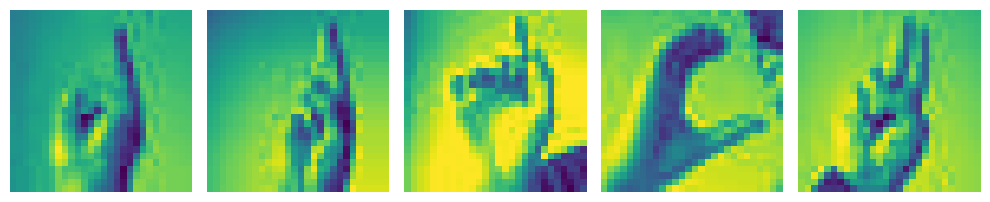

In [12]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

Con esto hemos cargado imágenes en memoria sin necesidad de saturar la memoria del sistema, cada vez que requieras iterar sobre tu dataset el generador solo generará las imágenes necesarias.